## DFO Nutrient Comparison

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle

mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
mpl.rc('legend', fontsize=10)
mpl.rc('axes', titlesize=10)
mpl.rc('axes', labelsize=10)
mpl.rc('figure', titlesize=10)
mpl.rc('font', size=10)
%matplotlib inline

In [9]:
PATH= '/results/SalishSea/longhind.201905/'
#PATH= '/results2/SalishSea/hindcast/'
start_date = dt.datetime(2007,1,1)
end_date = dt.datetime(2007,12,31)
flen=1
namfmt='nowcast'
#varmap={'N':'nitrate','Si':'silicon','Ammonium':'ammonium'}
filemap={'vosaline':'grid_T','votemper':'grid_T'}
#gridmap={'nitrate':'tmask','silicon':'tmask','ammonium':'tmask'}
fdict={'grid_T':1,}
df1=et.loadDFO(datelims=(start_date,end_date))
df1=df1.loc[(df1.Lon>-125)|(df1.Lat>49.5)].copy(deep=True)
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,2007.0,8.0,29.0,20.016111,51.678000,-127.333333,5.1,None,None,None,7.03,mg/m^3,17.0,23.0,umol/L,29.046929,9.528417,5.05546,2007-08-29 20:00:58
1,2007.0,8.0,29.0,21.636111,51.675667,-127.293000,5.5,None,None,None,6.60,mg/m^3,17.9,23.8,umol/L,29.041717,9.624807,5.45196,2007-08-29 21:38:10
2,2007.0,2.0,21.0,5.829444,51.678833,-127.332500,5.3,None,None,None,0.81,mg/m^3,18.5,40.2,umol/L,25.789058,7.098558,5.25371,2007-02-21 05:49:46
3,2007.0,2.0,21.0,6.477778,51.675167,-127.284667,5.2,None,None,None,0.81,mg/m^3,18.8,40.4,umol/L,25.660055,6.748061,5.15458,2007-02-21 06:28:40
4,2007.0,3.0,28.0,2.250278,50.655333,-126.183000,2.1,None,None,None,NaN,None,23.1,49.0,umol/L,28.188000,7.240257,2.08187,2007-03-28 02:15:01


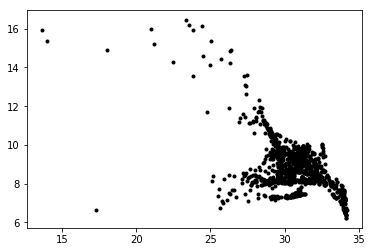

In [10]:
plt.plot(df1['AbsSal'],df1['ConsT'],'k.')

In [11]:
df1.loc[(~np.isnan(df1.AbsSal)),['AbsSal']].count()

AbsSal    1235
dtype: int64

In [12]:
df1.loc[(~np.isnan(df1.AbsSal))&(np.isnan(df1.N)),['AbsSal']].count()

AbsSal    43
dtype: int64

In [13]:
df1.loc[(~np.isnan(df1.ConsT))&(np.isnan(df1.N)),['ConsT']].count()

ConsT    43
dtype: int64

In [14]:
dataDFOPhys=et.matchData(df1,filemap, fdict, start_date, end_date, namfmt, PATH, flen)
dataDFO=dataDFOPhys

(Lat,Lon)= 50.605333333333334 -126.3565  not matched to domain
(Lat,Lon)= 50.635 -126.425  not matched to domain
(Lat,Lon)= 50.65533333333333 -126.183  not matched to domain
(Lat,Lon)= 50.66983333333334 -126.067  not matched to domain
(Lat,Lon)= 50.693666666666665 -125.78316666666667  not matched to domain
(Lat,Lon)= 50.72666666666667 -126.182  not matched to domain
(Lat,Lon)= 50.784 -126.61366666666666  not matched to domain
(Lat,Lon)= 50.813 -126.52483333333333  not matched to domain
(Lat,Lon)= 50.84 -126.33  not matched to domain
(Lat,Lon)= 50.93633333333333 -126.4815  not matched to domain
(Lat,Lon)= 51.018 -126.523  not matched to domain
(Lat,Lon)= 51.67516666666667 -127.28466666666667  not matched to domain
(Lat,Lon)= 51.675666666666665 -127.293  not matched to domain
(Lat,Lon)= 51.678 -127.33333333333333  not matched to domain
(Lat,Lon)= 51.67883333333333 -127.3325  not matched to domain


In [15]:
len(dataDFOPhys)

1103

In [16]:
#pickle.dump(dataDFOPhys,open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFOPhys2007.pkl','wb'))

In [17]:
cm1=plt.get_cmap('PuBuGn')

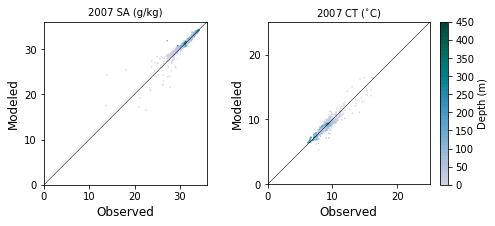

In [29]:
fig,ax = plt.subplots(1,2,figsize = (8,3))

ax[0].plot((0,36),(0,36),'k-',lw=.5)
ax[1].plot((0,25),(0,25),'k-',lw=.5)
vm0=-150
args={'marker':'.','s':1,}
ps=et.varvarScatter(ax[0],dataDFO,'AbsSal','mod_vosaline','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
ps=et.varvarScatter(ax[1],dataDFO,'ConsT','mod_votemper','Z',vmin=vm0,vmax=450,cm=cm1,args=args)

cb=fig.colorbar(ps,boundaries=np.linspace(0,450,46))
cb.set_label('Depth (m)')

ntick=np.arange(0,36,10)
ntickl=[str(i) for i in ntick]
for iax in (ax[0],):
    iax.set_xlim((0,36))
    iax.set_ylim((0,36))
    iax.set_xticks(ntick)
    iax.set_xticklabels(ntickl)
    iax.set_yticks(ntick)
    iax.set_yticklabels(ntickl)
    
stick=np.arange(0,25,10)
stickl=[str(i) for i in stick]
for iax in (ax[1],):
    iax.set_xlim((0,25))
    iax.set_ylim((0,25))
    iax.set_xticks(stick)
    iax.set_xticklabels(stickl)
    iax.set_yticks(stick)
    iax.set_yticklabels(stickl)
    
for iax in (ax[0],ax[1]):
    iax.set_aspect(1, adjustable='box')
    #ax.set_xlabel('Observed')
    
ax[0].set_ylabel('Modeled',fontsize=12)
ax[1].set_ylabel('Modeled',fontsize=12)
ax[0].set_xlabel('Observed',fontsize=12)
ax[1].set_xlabel('Observed',fontsize=12)

ax[0].set_title('2007 SA (g/kg)')
ax[1].set_title('2007 CT ($^{\circ}$C)')
